In [17]:
import json
import pandas as pd
import numpy as np
import itertools

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
from tqdm.notebook import tqdm

# Load data 

In [2]:
train = pd.read_json('../data/train.json')

In [3]:
song = pd.read_json('../data/song_meta.json')

In [4]:
genre = pd.read_json('../data/genre_gn_all.json', typ='series')

In [5]:
val = pd.read_json('../data/val.json')

In [6]:
train.shape, val.shape

((115071, 6), (23015, 6))

In [7]:
# 70만여곡
song.shape, genre.shape

((707989, 9), (254,))

## empty songs list

In [51]:
val['songs'] = val['songs'].apply(lambda x: x if len(x) >= 1 else [None])

# EDA

In [52]:
val[:50]

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[],118598,,"[373313, 151080, 275346, 696876, 165237, 52593...",1675,2019-05-27 14:14:33.000
1,[],131447,앨리스테이블,[None],1,2014-07-16 15:24:24.000
2,[],51464,,"[529437, 516103, 360067, 705713, 226062, 37089...",62,2008-06-21 23:26:22.000
3,[],45144,,"[589668, 21711, 570151, 320043, 13930, 599327,...",20,2017-10-30 18:15:43.000
4,[],79929,,"[672718, 121924, 102694, 683657, 201558, 38511...",20,2017-02-07 11:40:42.000
5,"[비, 분위기, 컨트리, 서정적인]",138538,,"[173033, 138237, 63140, 15733, 461780, 308519,...",2,2019-06-12 17:43:35.000
6,[],127575,,"[227044, 424672, 515592, 22408, 57893, 153714,...",2,2011-10-28 11:21:51.000
7,[],115317,,"[54457, 423722, 337682, 91214, 644980, 556444,...",3,2014-01-26 20:00:30.000
8,[스트레스],80810,리듬타면서 빡시게 운동하자!!!(스트레스 날리자):},[None],127,2017-02-09 17:33:45.000
9,[],142007,기분 좋은 재즈와 함께 만드는 달달한 하루,[None],0,2015-06-22 09:11:02.000


In [8]:
song.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4


In [27]:
train[:50]

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000
5,"[운동, 드라이브, Pop, 트로피컬하우스, 힐링, 기분전환, 2017, 팝, 트렌...",69252,2017 Pop Trend,"[418694, 222305, 96545, 135950, 304687, 457451...",435,2017-09-15 15:59:26.000
6,"[짝사랑, 취향저격, 슬픔, 고백, 사랑, 이별]",45339,짝사랑..고백..사랑..이별..슬픔.. 감성을 자극하는곡들!,"[528130, 505036, 398947, 627363, 37748, 376358...",24,2016-10-24 21:30:17.000
7,"[잔잔한, 추억, 회상]",36557,멍청이.. 내맘도 몰라.,"[496913, 632529, 501426, 515574, 411161, 10341...",5,2008-09-23 22:32:02.000
8,"[일렉트로니카, 포크, 메탈, 락, 댄스, 인디]",70741,DANCING IN THE MOON-LIGHT .01,"[634861, 270738, 163936, 692209, 449477, 56342...",0,2019-11-30 21:17:59.000
9,"[록, Metal, 이일우, M에센셜, 메탈, Rock, 락]",10288,[록/메탈] Written by 이일우,"[613315, 439294, 230806, 497932, 113479, 93506...",7,2016-06-17 18:23:54.000


In [29]:
songlist = train.songs.tolist()

In [30]:
songlist[0]

[525514,
 129701,
 383374,
 562083,
 297861,
 139541,
 351214,
 650298,
 531057,
 205238,
 706183,
 127099,
 660493,
 461973,
 121455,
 72552,
 223955,
 324992,
 50104]

In [31]:
# for i in songlist:
#     song_title = [song[song.id==x].song_name for x in i]
#     print(song_title)
#     break

In [12]:
songlist[0]

[525514,
 129701,
 383374,
 562083,
 297861,
 139541,
 351214,
 650298,
 531057,
 205238,
 706183,
 127099,
 660493,
 461973,
 121455,
 72552,
 223955,
 324992,
 50104]

In [21]:
# train data의 unique tag 개수
len(set(list(itertools.chain(*train.tags.to_list()))))

29160

In [73]:
val[(val['plylst_title']=='')&(len(val['songs'])<1)]

,tags,id,plylst_title,songs,like_cnt,updt_date


In [77]:
len([51,52])

2

In [80]:
val[(val['plylst_title']!='')]

,tags,id,plylst_title,songs,like_cnt,updt_date
1,[],131447,앨리스테이블,[None],1,2014-07-16 15:24:24.000
8,[스트레스],80810,리듬타면서 빡시게 운동하자!!!(스트레스 날리자):},[None],127,2017-02-09 17:33:45.000
9,[],142007,기분 좋은 재즈와 함께 만드는 달달한 하루,[None],0,2015-06-22 09:11:02.000
17,[생각나],2380,다시 생각나는 그 사람,[None],6,2016-03-19 23:53:20.000
20,"[피아노, 이루마, 메로디]",149069,불면증엔 아름다운 뉴에이지 곡들,[None],11,2019-12-15 19:15:21.000
...,...,...,...,...,...,...
22991,[],32537,컨트리 황제 조니 캐시가 선 레코드 시절 발표한 초기 대표작,[None],28,2019-06-17 14:22:48.000
22992,[사랑],32812,♥옷차림이 가벼워질때 부담없이 듣는음악♥,[None],8,2015-05-08 00:09:01.000
22996,[],86721,해 저무는 밤,[None],5,2016-04-27 15:32:55.000
23002,"[텐션, 명곡, 학창시절, 텐션업]",56570,숨어듣는명곡! 텐션올릴때듣는 그시절그노래!! (그냥명곡있을수있음주의),[None],538,2020-04-18 22:02:07.000


In [79]:
val[(val['plylst_title']!='')&(len(val['songs'])>=2)]

,tags,id,plylst_title,songs,like_cnt,updt_date
1,[],131447,앨리스테이블,[None],1,2014-07-16 15:24:24.000
8,[스트레스],80810,리듬타면서 빡시게 운동하자!!!(스트레스 날리자):},[None],127,2017-02-09 17:33:45.000
9,[],142007,기분 좋은 재즈와 함께 만드는 달달한 하루,[None],0,2015-06-22 09:11:02.000
17,[생각나],2380,다시 생각나는 그 사람,[None],6,2016-03-19 23:53:20.000
20,"[피아노, 이루마, 메로디]",149069,불면증엔 아름다운 뉴에이지 곡들,[None],11,2019-12-15 19:15:21.000
...,...,...,...,...,...,...
22991,[],32537,컨트리 황제 조니 캐시가 선 레코드 시절 발표한 초기 대표작,[None],28,2019-06-17 14:22:48.000
22992,[사랑],32812,♥옷차림이 가벼워질때 부담없이 듣는음악♥,[None],8,2015-05-08 00:09:01.000
22996,[],86721,해 저무는 밤,[None],5,2016-04-27 15:32:55.000
23002,"[텐션, 명곡, 학창시절, 텐션업]",56570,숨어듣는명곡! 텐션올릴때듣는 그시절그노래!! (그냥명곡있을수있음주의),[None],538,2020-04-18 22:02:07.000


### playlists length

In [91]:
train['songs'].apply(lambda x: len(x)).min()

1

In [92]:
train['songs'].apply(lambda x: len(x)).max()

200

In [119]:
np.percentile(train['songs'].apply(lambda x: len(x)), 1)

7.0

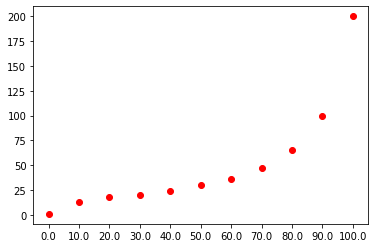

In [112]:
d = train['songs'].apply(lambda x: len(x))
p = np.array([0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0])

perc = np.percentile(d, p)

# plt.plot(d)
plt.plot((len(d)-1) * p/100., perc, 'ro')
plt.xticks((len(d)-1) * p/100., map(str, p))
plt.show()

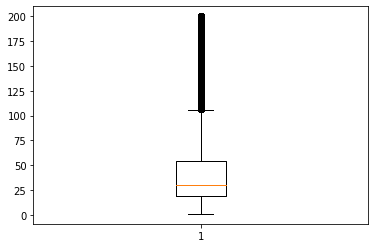

In [120]:
plt.boxplot(d)
plt.show()

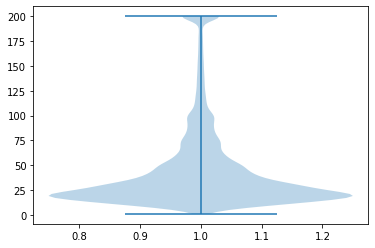

In [121]:
plt.violinplot(d)
plt.show()

### rare songs, tags

In [81]:
len(song)

707989

In [82]:
from collections import Counter

playlists = train.songs.to_list()
cx = Counter()
for playlist in playlists:
    for song_id in playlist:
        cx[song_id] += 1

In [89]:
len(Counter(el for el in cx.elements() if cx[el] < 6))

490516

In [87]:
len(Counter(el for el in cx.elements() if cx[el] < 5))

470468

In [88]:
len(Counter(el for el in cx.elements() if cx[el] < 4))

441073

In [137]:
len(Counter(el for el in cx.elements() if cx[el] < 3))

393486

In [143]:
len(Counter(el for el in cx.elements() if cx[el] < 2))

299028

In [145]:
# hist = []
# for x in tqdm(range(1,2180)):
#     num = len(Counter(el for el in cx.elements() if cx[el] < x))
#     hist.append(num)

In [146]:
# plt.plot(range(0, 2180), hist)

In [129]:
cx.most_common()

[(144663, 2175),
 (116573, 2121),
 (357367, 1981),
 (366786, 1919),
 (654757, 1647),
 (133143, 1633),
 (349492, 1599),
 (675115, 1598),
 (463173, 1544),
 (42155, 1540),
 (610933, 1538),
 (396828, 1538),
 (461341, 1526),
 (174749, 1512),
 (520093, 1508),
 (701557, 1507),
 (549178, 1501),
 (485155, 1492),
 (650494, 1479),
 (523521, 1476),
 (13281, 1473),
 (648628, 1470),
 (449244, 1468),
 (680366, 1467),
 (169984, 1463),
 (422915, 1455),
 (11657, 1452),
 (418935, 1446),
 (187047, 1437),
 (547967, 1434),
 (422077, 1432),
 (350309, 1425),
 (627363, 1424),
 (625875, 1421),
 (300087, 1415),
 (132994, 1414),
 (215411, 1408),
 (427724, 1407),
 (442014, 1403),
 (668128, 1402),
 (582252, 1380),
 (663256, 1378),
 (253755, 1375),
 (643628, 1375),
 (448116, 1368),
 (339802, 1364),
 (581799, 1363),
 (348200, 1363),
 (26083, 1355),
 (37748, 1354),
 (341513, 1338),
 (505036, 1334),
 (199262, 1333),
 (407828, 1325),
 (105140, 1324),
 (68348, 1324),
 (140867, 1323),
 (235773, 1320),
 (209993, 1313),
 (2

### association rule

In [17]:
# Training Apriori on the dataset
from apyori import apriori
rules = apriori(songlist[:100], min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [18]:
# Visualising the results
results = list(rules)

KeyboardInterrupt: 